In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Többdimenziós tömb bejárása
mat = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Soronként:")
for sor in mat:
    print(sor)

print("Elemről elemre:")
for sor in mat:
    for elem in sor:
        print(elem)

Soronként:
[1 2 3]
[4 5 6]
Elemről elemre:
1
2
3
4
5
6


In [29]:
# Ha tényleg az összes elem kell, használd a nditer-t
print("nditer-rel:")
for elem in np.nditer(mat):
    print(int(elem))

nditer-rel:
1
2
3
4
5
6


In [3]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])

for elem in np.nditer(arr, op_flags=['readwrite']):
    elem[...] = elem * 8

print("Módosított:", arr)
# op_flags=['readwrite'] azt mondja: ne csak olvasni lehessen az elemet, hanem írni is.
# Így akár minden elemet megszorzol, módosítod stb.

Módosított: [ 8 16 24 32 40]


In [9]:
# flat attribútum – lapított bejárás
mat = np.arange(9).reshape(3, 3)
print(mat)

for elem in mat.flat:
    print(elem, end=" ")

osszeg = sum(mat.flat)
print("\nÖsszes elem összege:", osszeg)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
0 1 2 3 4 5 6 7 8 
Összes elem összege: 36


In [6]:
arr = np.array([10, 20, 30, 40])

for idx, val in np.ndenumerate(arr):
    print(f"Index: {idx}, Érték: {val}")

Index: (0,), Érték: 10
Index: (1,), Érték: 20
Index: (2,), Érték: 30
Index: (3,), Érték: 40


In [31]:
arr = np.array([[10, 20], [30, 40]])

for idx, val in np.ndenumerate(arr):
    print(f"Index: {idx}, Érték: {val}")

Index: (0, 0), Érték: 10
Index: (0, 1), Érték: 20
Index: (1, 0), Érték: 30
Index: (1, 1), Érték: 40


In [10]:
# Számold meg, hány páros szám van egy 2D tömbben
import numpy as np

mat = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

count = 0

for elem in np.nditer(mat):   # bejár minden elemet
    if elem % 2 == 0:
        count += 1

print("Páros számok száma:", count)

Páros számok száma: 4


In [12]:
# Járd be a 3×3 tömböt .flat-tel és nditer-rel
arr = np.arange(9).reshape(3, 3)
print("Tömb:\n", arr)

print("\nBejárás .flat segítségével:")
for x in arr.flat:
    print(int(x), end=" ")

# nem módosította a flat hívás az eredeti tömböt:
print()
print(arr)

print("\n\nBejárás nditer-rel:")
for x in np.nditer(arr):
    print(int(x), end=" ")

Tömb:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]

Bejárás .flat segítségével:
0 1 2 3 4 5 6 7 8 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


Bejárás nditer-rel:
0 1 2 3 4 5 6 7 8 

In [20]:
# Növeld minden második elemet 5-tel
mat = np.arange(1, 10).reshape(3, 3)
print("Eredeti:\n", mat)

for x in mat.flat:
    print(int(x), end=" ")
print()

for idx, elem in enumerate(mat.flat):
    if idx % 2 == 1:        # minden második
        mat.flat[idx] = elem * 2

print("Módosított:\n", mat)

mat = np.arange(1, 10).reshape(3, 3)
for idx, val in np.ndenumerate(mat):
    if (idx[0] + idx[1]) % 2 == 1:
        mat[idx] *= 3

print("Újra Módosított:\n", mat)

Eredeti:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
1 2 3 4 5 6 7 8 9 
Módosított:
 [[ 1  4  3]
 [ 8  5 12]
 [ 7 16  9]]
Újra Módosított:
 [[ 1  6  3]
 [12  5 18]
 [ 7 24  9]]


In [25]:
# Képezd minden elem négyzetét in-place (helyben)
arr = np.arange(1,10).reshape(3,3)

for elem in np.nditer(arr, op_flags=['readwrite']):
    elem[...] = pow(elem, 3)   # módosítás helyben (in-place)

print("Négyzetre emelve:\n", arr)

Négyzetre emelve:
 [[  1   8  27]
 [ 64 125 216]
 [343 512 729]]


In [28]:
# Írd ki minden sor átlagát for sor in arr: formában
arr = np.array([[10, 20, 30],
                [5, 15, 25],
                [8, 9, 10]])

for sor in arr:
    atlag = sor.mean()     # minden sor önálló NumPy tömb
    print("Sor:", sor, "átlaga:", atlag)

print("Az egész átlaga:", arr.mean())
print("Az egész összegzése:", arr.sum())
print("Az egész minimuma:", arr.min()) # stb...

Sor: [10 20 30] átlaga: 20.0
Sor: [ 5 15 25] átlaga: 15.0
Sor: [ 8  9 10] átlaga: 9.0
Az egész átlaga: 14.666666666666666
Az egész összegzése: 132
Az egész minimuma: 5


In [34]:
rng = np.random.default_rng(42)  # reprodukálhatóság

# Negatív elemek száma (for-ciklus nélkül)
# 10_000 elem, vegyes előjel
arr = rng.normal(loc=0.0, scale=1.0, size=10_000)

# lehet, hogy alapból így csinálnám az eddigi numpy-os iterációs tudásunkkal:
count = 0
for elem in np.nditer(arr):
    if elem < 0:
        count += 1
print(f"Negatív elemek száma: {count}")

# Vektorizált feltétel --> logikai tömb --> .sum() megszámolja az igazakat
neg_db = (arr < 0).sum()
print(f"Negatív elemek száma: {neg_db}, ennyiből: {arr.size}")


Negatív elemek száma: 5055
Negatív elemek száma: 5055, ennyiből: 10000


[ 2  4  6  8 10 12]  ==>  [ 2  4  6  8 10 12]


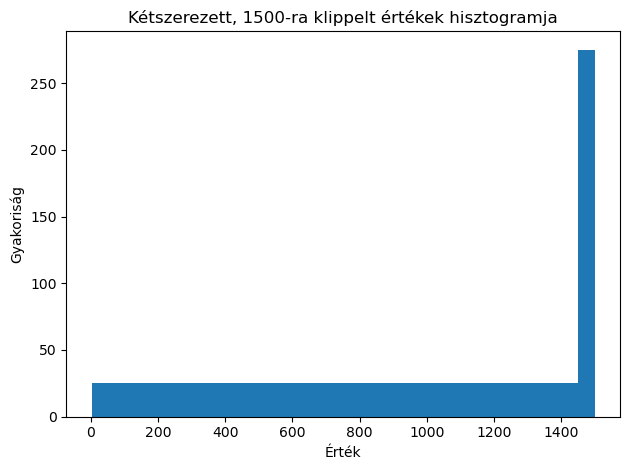

In [20]:
import matplotlib.pyplot as plt
# Elemszintű kétszerezés + felső korlát, majd hisztogram
arr = np.arange(1, 1001)     # 1..1000
duplazott = arr * 2          # elemenkénti szorzás
klippelt = np.minimum(duplazott, 1500)  # felső korlát vektorizáltan

print(duplazott[:6], " ==> ", klippelt[:6])  # ellenőrzés

plt.figure()
plt.hist(klippelt, bins=30)
plt.title("Kétszerezett, 1500-ra klippelt értékek hisztogramja")
plt.xlabel("Érték")
plt.ylabel("Gyakoriság")
plt.tight_layout()
plt.show()

Kiválasztott elemek száma: 23


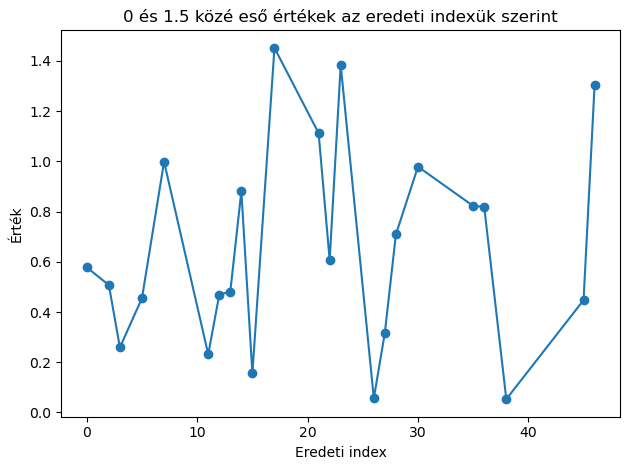

In [19]:
# Kiválasztás összetett feltétellel, majd az eredeti indexek szerinti ábra
arr = rng.normal(loc=0.5, scale=1.0, size=2000)

mask = (arr > 0) & (arr < 1.5)  # vektorizált logikai művelet
kivalasztott_indexek = np.flatnonzero(mask)  # eredeti indexek
kivalasztott_ertekek = arr[mask]             # szűrt értékek

print(f"Kiválasztott elemek száma: {kivalasztott_ertekek.size}")

plt.figure()
plt.plot(kivalasztott_indexek, kivalasztott_ertekek, marker="o")
plt.title("0 és 1.5 közé eső értékek az eredeti indexük szerint")
plt.xlabel("Eredeti index")
plt.ylabel("Érték")
plt.tight_layout()
plt.show()

Nyertes oszlopok darabszáma (0..19):
[2 3 3 0 3 5 4 2 2 1 4 1 3 5 0 2 2 2 2 4]


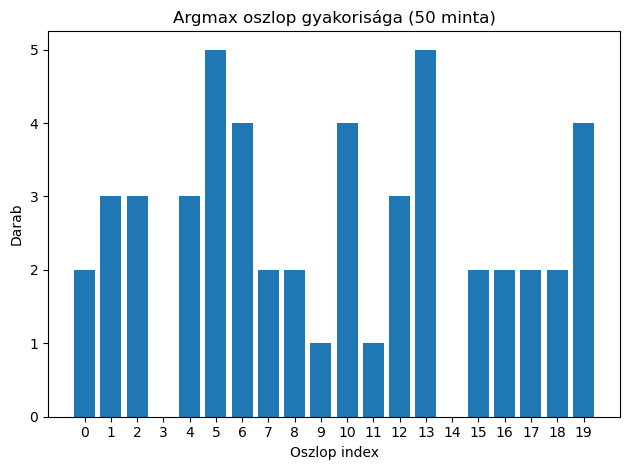

In [25]:
# 50×20 mátrix: soronkénti argmax, majd a „nyertes oszlopok” eloszlása
data = rng.normal(size=(50, 20))

# Soronként melyik oszlop a legnagyobb? (vektorizált)
winners = data.argmax(axis=1)  # shape: (50,)

# Hányszor nyert az egyes oszlop? (0..19)
eloszlas = np.bincount(winners, minlength=20)

print("Nyertes oszlopok darabszáma (0..19):")
print(eloszlas)

plt.figure()
plt.bar(np.arange(20), eloszlas)
plt.title("Argmax oszlop gyakorisága (50 minta)")
plt.xlabel("Oszlop index")
plt.ylabel("Darab")
plt.xticks(np.arange(20))
plt.tight_layout()
plt.show()

Max norma indexe: 585, értéke: 4.2989


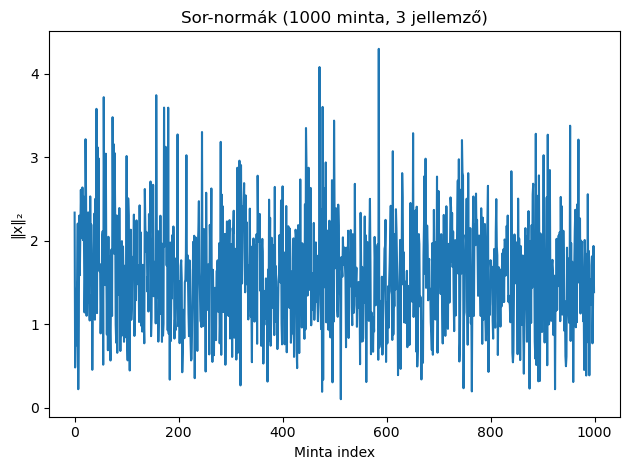

In [27]:
# 1000×3 mátrix sor-normái (euclid-norma) és a legnagyobb kiválasztása

X = rng.normal(size=(1000, 3))

# Vektorizált norma (soronként)
normak = np.linalg.norm(X, axis=1)

idx_max = normak.argmax()  # ahol a legnagyobb
print(f"Max norma indexe: {idx_max}, értéke: {normak[idx_max]:.4f}")

# (Opcionális) szemléltetés
plt.figure()
plt.plot(normak)
plt.title("Sor-normák (1000 minta, 3 jellemző)")
plt.xlabel("Minta index")
plt.ylabel("‖x‖₂")
plt.tight_layout()
plt.show()